In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [2]:
import numpy as np 
import pandas as pd
import joblib 

In [3]:
train=pd.read_csv("fraudTrain.csv")
test=pd.read_csv("fraudTest.csv")

In [4]:
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
train['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [7]:
test['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'cc_num'}>,
        <Axes: title={'center': 'amt'}>],
       [<Axes: title={'center': 'zip'}>, <Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>],
       [<Axes: title={'center': 'city_pop'}>,
        <Axes: title={'center': 'unix_time'}>,
        <Axes: title={'center': 'merch_lat'}>],
       [<Axes: title={'center': 'merch_long'}>,
        <Axes: title={'center': 'is_fraud'}>, <Axes: >]], dtype=object)

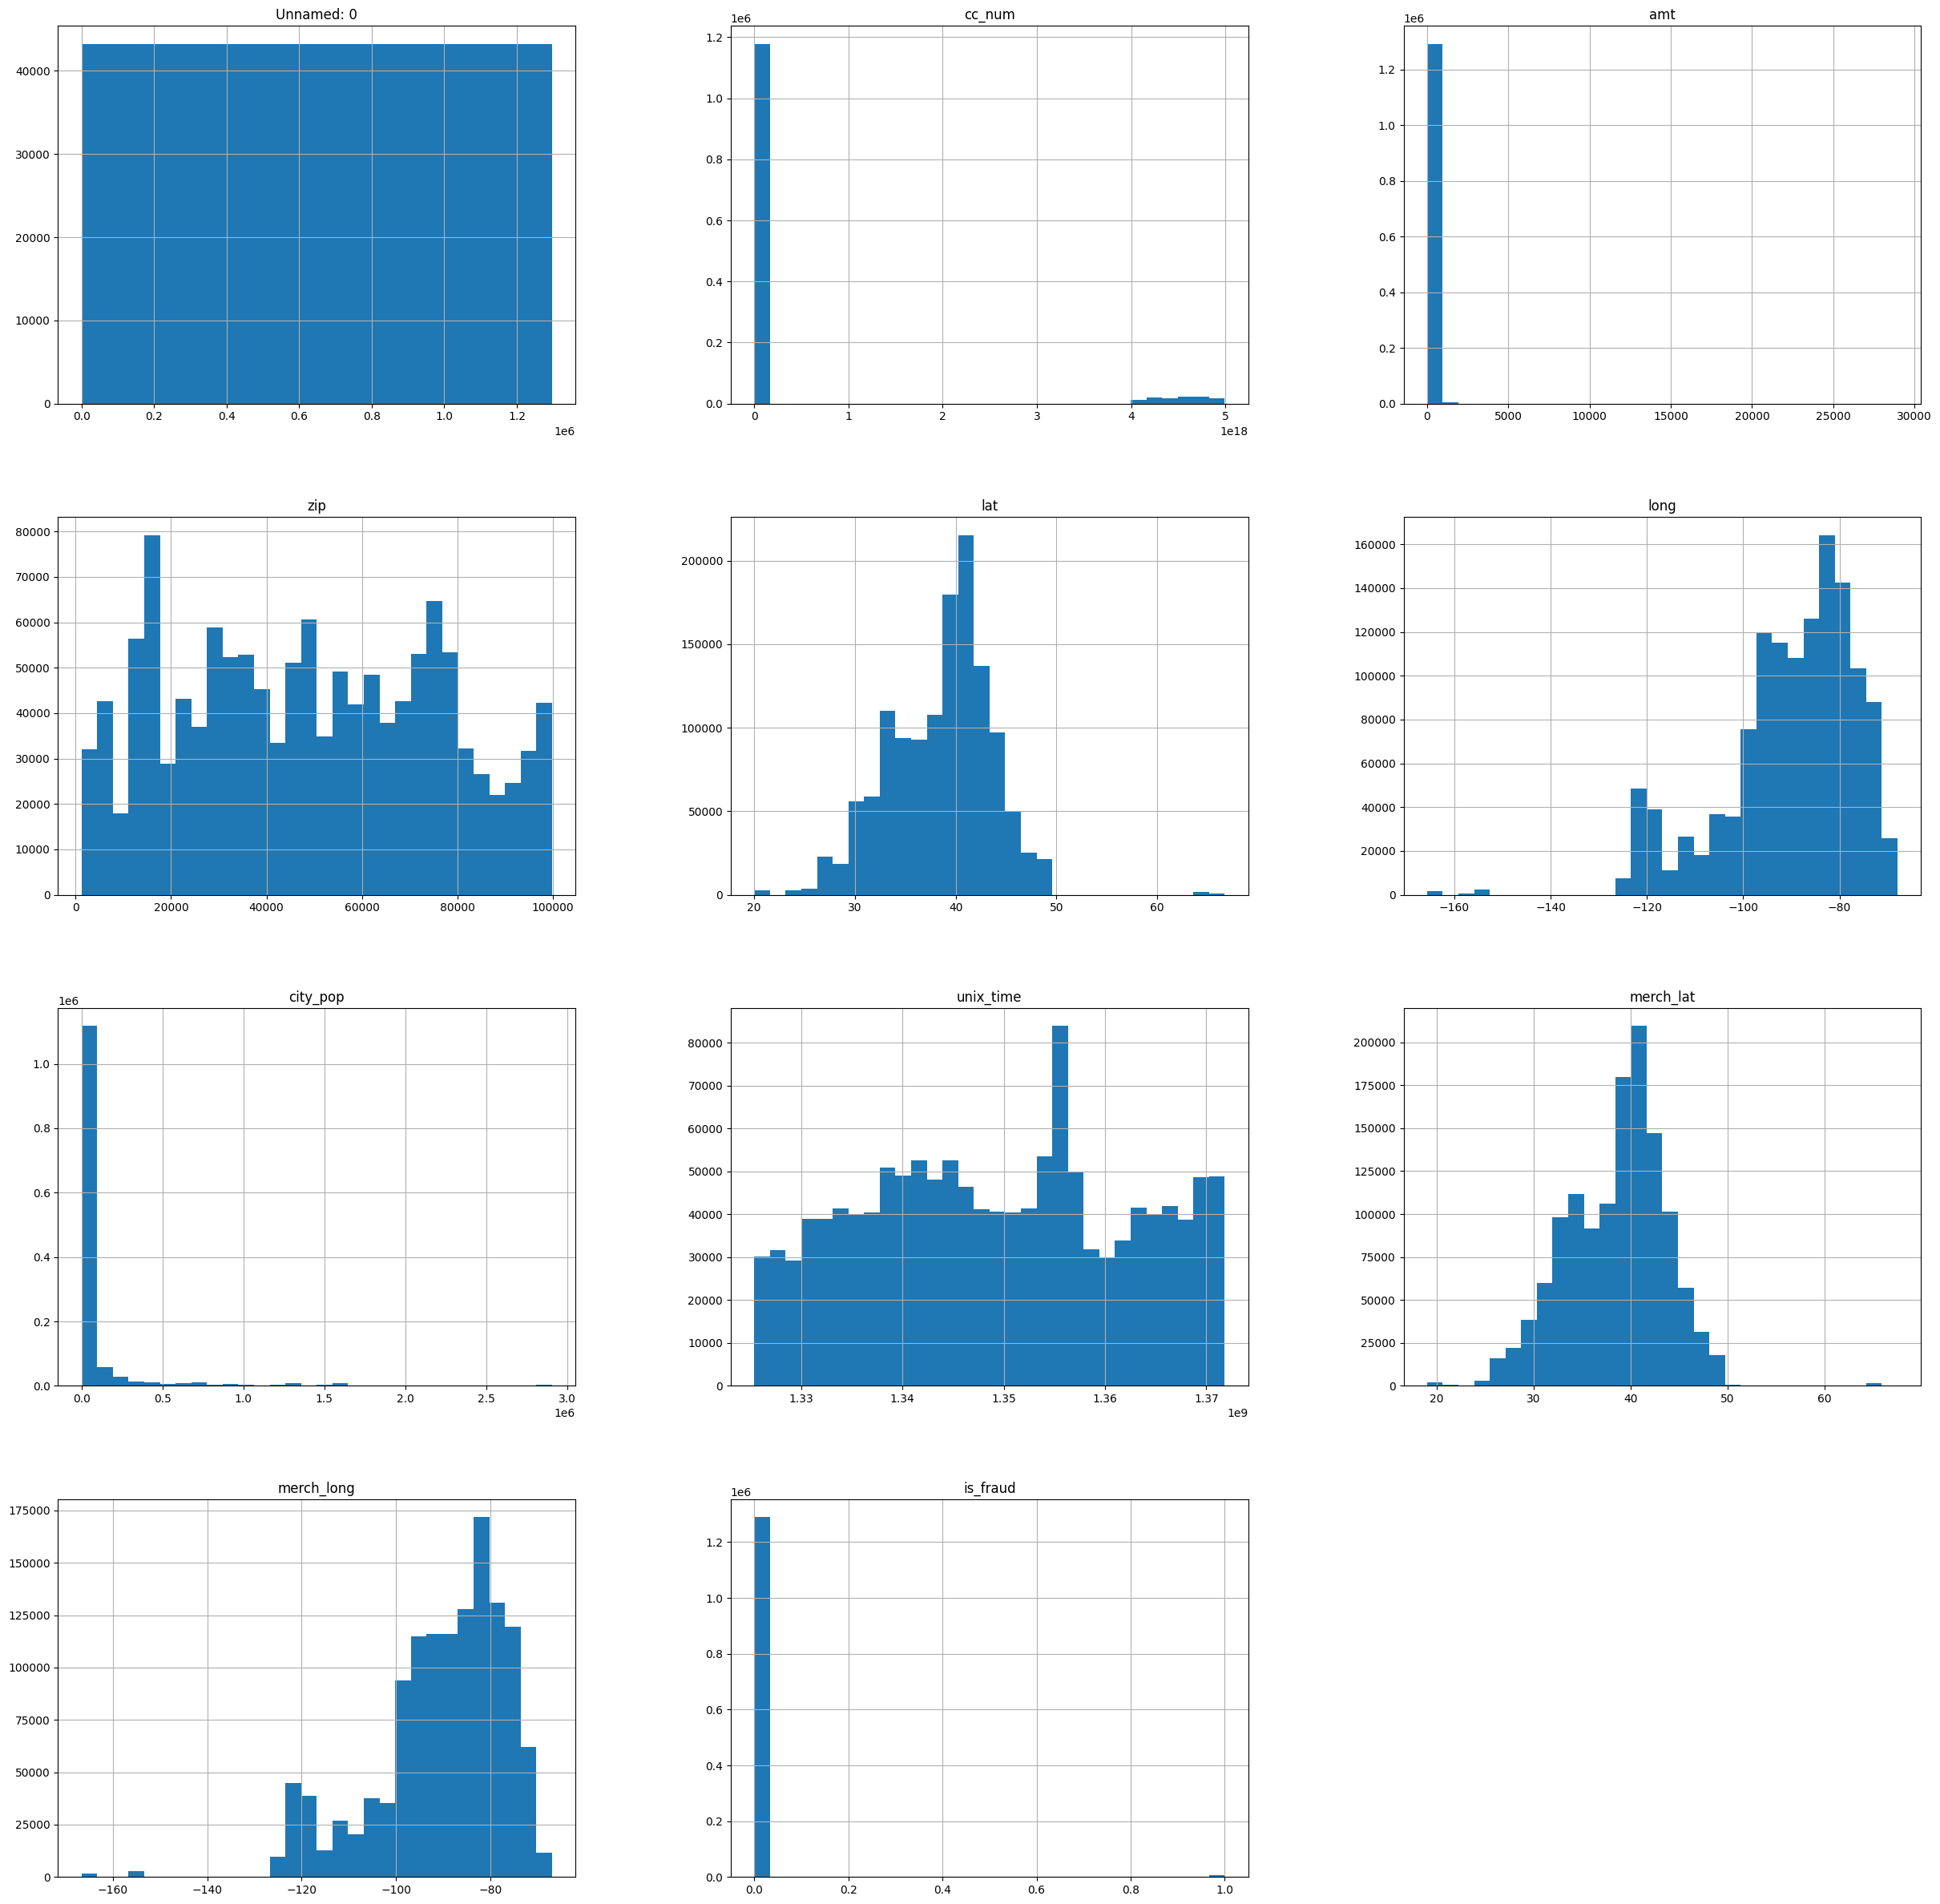

In [8]:
train.hist(bins=30, figsize=(30,30))

In [9]:
train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [10]:
train.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [11]:
test.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [12]:
train.drop(columns=('Unnamed: 0'),inplace=True)
test.drop(columns=('Unnamed: 0'),inplace=True)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

In [15]:
train['trans_date_trans_time'] = pd.to_datetime(train['trans_date_trans_time'])
train['dob'] = pd.to_datetime(train['dob'])
train['unix_time'] = pd.to_datetime(train['unix_time'], unit='s')

In [16]:
test['trans_date_trans_time'] = pd.to_datetime(test['trans_date_trans_time'])
test['dob'] = pd.to_datetime(test['dob'])
test['unix_time'] = pd.to_datetime(test['unix_time'], unit='s')

In [17]:
train['is_fraud'] = train['is_fraud'].astype(bool)
test['is_fraud'] = test['is_fraud'].astype(bool)

In [18]:
print(train['is_fraud'].dtype)
print(test['is_fraud'].dtype)

bool
bool


In [19]:
train['trans_date_trans_time'] = pd.to_datetime(train['trans_date_trans_time'])
test['trans_date_trans_time'] = pd.to_datetime(test['trans_date_trans_time'])

In [20]:
train['year'] = train['trans_date_trans_time'].dt.year
train['month'] = train['trans_date_trans_time'].dt.month
train['day'] = train['trans_date_trans_time'].dt.day
train['hour'] = train['trans_date_trans_time'].dt.hour
train['minute'] = train['trans_date_trans_time'].dt.minute

In [21]:
test['year'] = test['trans_date_trans_time'].dt.year
test['month'] = test['trans_date_trans_time'].dt.month
test['day'] = test['trans_date_trans_time'].dt.day
test['hour'] = test['trans_date_trans_time'].dt.hour
test['minute'] = test['trans_date_trans_time'].dt.minute

In [22]:
train = train.drop(columns=['trans_date_trans_time'])
test = test.drop(columns=['trans_date_trans_time'])

In [23]:
categorical_cols = [col for col in train.columns if train[col].dtype == 'object']

In [24]:
train.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender',
       'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'year', 'month', 'day', 'hour', 'minute'],
      dtype='object')

In [25]:
test.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender',
       'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'year', 'month', 'day', 'hour', 'minute'],
      dtype='object')

In [26]:
categorical_cols

['merchant',
 'category',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'job',
 'trans_num']

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 26 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   cc_num      1296675 non-null  int64         
 1   merchant    1296675 non-null  object        
 2   category    1296675 non-null  object        
 3   amt         1296675 non-null  float64       
 4   first       1296675 non-null  object        
 5   last        1296675 non-null  object        
 6   gender      1296675 non-null  object        
 7   street      1296675 non-null  object        
 8   city        1296675 non-null  object        
 9   state       1296675 non-null  object        
 10  zip         1296675 non-null  int64         
 11  lat         1296675 non-null  float64       
 12  long        1296675 non-null  float64       
 13  city_pop    1296675 non-null  int64         
 14  job         1296675 non-null  object        
 15  dob         1296675 non-null  da

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
label_encoders = {}

In [30]:
for col in categorical_cols:
    le = LabelEncoder()

    # Fit on combined data (train + test) to maintain consistency
    combined_data = pd.concat([train[col], test[col]], axis=0).astype(str)
    le.fit(combined_data)

    # Transform train and test sets
    train[col] = le.transform(train[col].astype(str))
    test[col] = le.transform(test[col].astype(str))

    # Store the encoder for future use
    label_encoders[col] = le

In [31]:
encoders = {}
categorical_features = ['merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'trans_num']

for feature in categorical_features:
    encoders[feature] = LabelEncoder()
    encoders[feature].fit(train[feature])  

joblib.dump(encoders, "label_encoders.pkl")

['label_encoders.pkl']

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
corr_matrix = train.corr()

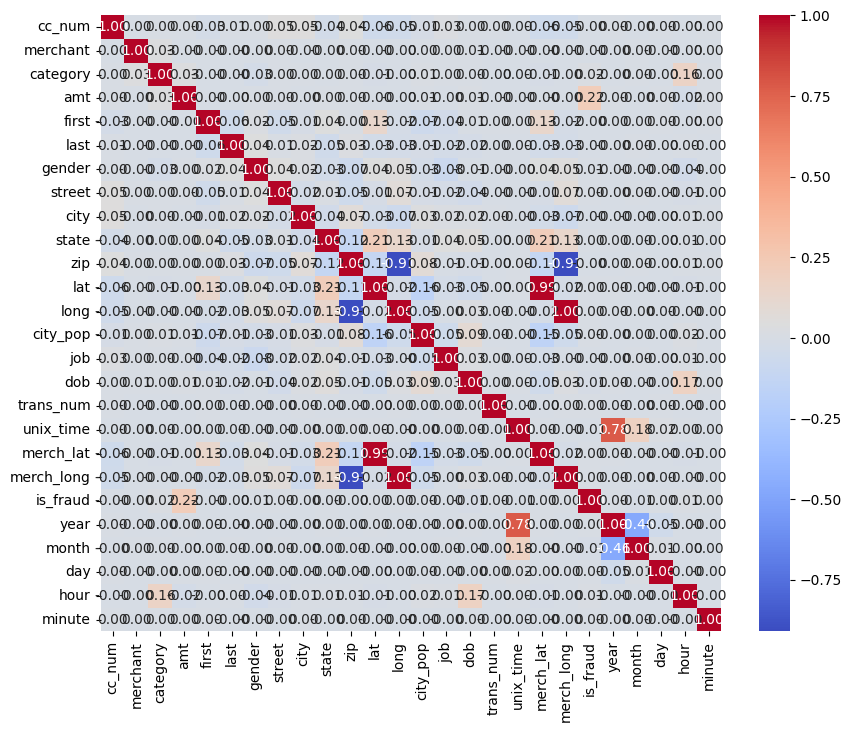

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [35]:
drop_columns = ['zip','unix_time','merch_lat','merch_long','long','lat','city_pop']

In [36]:
train = train.drop(columns=drop_columns)
test = test.drop(columns=drop_columns)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [38]:
train.drop(columns=['dob'],inplace=True)
test.drop(columns=['dob'],inplace=True)

In [39]:
train.shape, test.shape

((1296675, 18), (555719, 18))

In [40]:
not_frauds = train.query('is_fraud == 0')
frauds = train.query('is_fraud == 1')
not_frauds['is_fraud'].value_counts(), frauds['is_fraud'].value_counts()

(is_fraud
 False    1289169
 Name: count, dtype: int64,
 is_fraud
 True    7506
 Name: count, dtype: int64)

In [41]:
balanced_train = pd.concat([frauds, not_frauds.sample(len(frauds), random_state=1)])
balanced_train['is_fraud'].value_counts()

is_fraud
True     7506
False    7506
Name: count, dtype: int64

In [42]:
Tnot_frauds = test.query('is_fraud == 0')
Tfrauds = test.query('is_fraud == 1')
Tnot_frauds['is_fraud'].value_counts(), Tfrauds['is_fraud'].value_counts()

(is_fraud
 False    553574
 Name: count, dtype: int64,
 is_fraud
 True    2145
 Name: count, dtype: int64)

In [43]:
balanced_test = pd.concat([Tfrauds, Tnot_frauds.sample(len(Tfrauds), random_state=1)])
balanced_test['is_fraud'].value_counts()

is_fraud
True     2145
False    2145
Name: count, dtype: int64

In [44]:
balanced_train.shape, balanced_test.shape

((15012, 18), (4290, 18))

In [45]:
X_train = balanced_train.drop(columns=['is_fraud'])
y_train = balanced_train['is_fraud']
X_val = balanced_test.drop(columns=['is_fraud'])
y_val = balanced_test['is_fraud']

In [46]:
X_train.shape, X_val.shape

((15012, 17), (4290, 17))

In [47]:
X_train.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender',
       'street', 'city', 'state', 'job', 'trans_num', 'year', 'month', 'day',
       'hour', 'minute'],
      dtype='object')

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.fit_transform(X_val)

In [50]:
X_train

array([[-0.31406083,  1.01438556, -0.70265941, ..., -1.56703781,
        -1.48497393, -1.37222449],
       [-0.31379989, -0.29434573, -1.21770167, ..., -1.56703781,
        -1.48497393,  1.00381907],
       [-0.31379989, -0.74580731, -0.70265941, ..., -1.56703781,
        -1.24645785, -1.43017677],
       ...,
       [-0.31134122, -1.07552643,  1.35750964, ...,  1.17067546,
         0.42315473, -0.15522657],
       [-0.31028569, -0.17260329, -0.70265941, ..., -0.99668088,
        -1.48497393, -1.71993818],
       [-0.31128341,  0.64408562, -1.73274393, ..., -0.99668088,
         0.66167082,  1.11972363]], shape=(15012, 17))

In [51]:
X_val

array([[-0.30749463, -0.60150643, -0.47623751, ...,  0.58934078,
         1.00925363, -1.34575138],
       [-0.30517282,  0.90523972,  0.30634379, ...,  0.58934078,
         1.00925363,  0.16764906],
       [-0.30517282,  0.53996792, -1.78053969, ...,  0.58934078,
         1.00925363,  0.4586876 ],
       ...,
       [-0.30560007,  0.35733203, -0.73709795, ...,  1.37267649,
        -1.60443745,  0.92434928],
       [-0.30560034,  1.09802205, -1.51967925, ..., -0.41780513,
         0.05882051, -0.53084345],
       [-0.30995904,  1.51909926, -1.78053969, ...,  1.03696118,
         0.53403707, -0.47263574]], shape=(4290, 17))

In [52]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_val)
print("Logistic Regression:\n", classification_report(y_val, y_pred_lr))


Logistic Regression:
               precision    recall  f1-score   support

       False       0.79      0.94      0.86      2145
        True       0.93      0.75      0.83      2145

    accuracy                           0.85      4290
   macro avg       0.86      0.85      0.85      4290
weighted avg       0.86      0.85      0.85      4290



In [53]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_val)
print("Decision Tree:\n", classification_report(y_val, y_pred_dt))

Decision Tree:
               precision    recall  f1-score   support

       False       0.95      0.95      0.95      2145
        True       0.95      0.95      0.95      2145

    accuracy                           0.95      4290
   macro avg       0.95      0.95      0.95      4290
weighted avg       0.95      0.95      0.95      4290



In [54]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)
print("Random Forest:\n", classification_report(y_val, y_pred_rf))


Random Forest:
               precision    recall  f1-score   support

       False       0.94      0.97      0.96      2145
        True       0.97      0.94      0.96      2145

    accuracy                           0.96      4290
   macro avg       0.96      0.96      0.96      4290
weighted avg       0.96      0.96      0.96      4290



In [55]:
train['amt'].describe()

count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.752000e+01
75%      8.314000e+01
max      2.894890e+04
Name: amt, dtype: float64

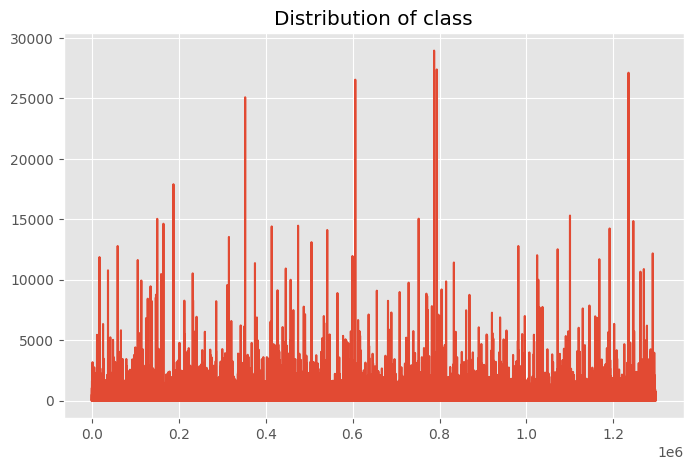

In [56]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(8, 5))
    plt.title("Distribution of class")
    plt.plot(train['amt'])
    plt.show()

In [57]:
from sklearn.metrics import accuracy_score


In [58]:
accuracy = accuracy_score(y_val, y_pred_lr)
print(f"Logistic regression Accuracy: {accuracy}")

Logistic regression Accuracy: 0.8484848484848485


In [59]:
accuracy = accuracy_score(y_val, y_pred_dt)
print(f"Decision tree Accuracy: {accuracy}")


Decision tree Accuracy: 0.9522144522144522


In [60]:
accuracy = accuracy_score(y_val, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy}")

Random Forest Accuracy: 0.9578088578088578


In [61]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [62]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [63]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}
best_model = None
best_accuracy = 0

In [64]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_val, y_pred))
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model

Logistic Regression Accuracy: 0.8485
              precision    recall  f1-score   support

       False       0.79      0.94      0.86      2145
        True       0.93      0.75      0.83      2145

    accuracy                           0.85      4290
   macro avg       0.86      0.85      0.85      4290
weighted avg       0.86      0.85      0.85      4290

Decision Tree Accuracy: 0.9522
              precision    recall  f1-score   support

       False       0.95      0.95      0.95      2145
        True       0.95      0.95      0.95      2145

    accuracy                           0.95      4290
   macro avg       0.95      0.95      0.95      4290
weighted avg       0.95      0.95      0.95      4290

Random Forest Accuracy: 0.9578
              precision    recall  f1-score   support

       False       0.94      0.97      0.96      2145
        True       0.97      0.94      0.96      2145

    accuracy                           0.96      4290
   macro avg       0.96      

In [65]:
print(best_model)

RandomForestClassifier(random_state=42)


In [66]:
joblib.dump(best_model, "fraud_Model.pkl")


['fraud_Model.pkl']

In [67]:
print("Model training completed.")

Model training completed.


In [68]:
loaded_model = joblib.load("fraud_Model.pkl")

In [69]:
def predict_fraud(new_data):
    new_data = pd.DataFrame(new_data)
    
    # Preprocess new data
    for col in categorical_cols:
        if col in label_encoders:
            new_data[col] = label_encoders[col].transform(new_data[col].astype(str))

    new_data = scaler.transform(new_data)
    
    prediction = loaded_model.predict(new_data)
    return prediction